In [3]:
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection as modsel
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 線形回帰

#### データセットの読み込み

dir():データの構成要素\
'DESCR':データセットに関する詳細情報\
'data':全データ\
'feature_names':全特徴量名\
'target':全目標値に関する情報

In [6]:
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [7]:
boston.data.shape

(506, 13)

In [8]:
boston.target.shape

(506,)

#### モデルの学習

In [9]:
linreg = linear_model.LinearRegression()

In [12]:
X_train, X_test, y_train, y_test = modsel.train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=42
)

In [13]:
linreg.fit(X_train, y_train)

LinearRegression()

予測値と実際の値の平均二乗誤差

In [15]:
metrics.mean_squared_error(y_train, linreg.predict(X_train))

22.7375901544866

linregオブジェクトのscoreメソッドは決定係数($R^2$)を返す。

In [19]:
linreg.score(X_train, y_train)

0.7375152736886281

#### 汎化性能の評価

平均二乗誤差は学習セットを用いた場合よりも評価セットを用いた場合の方が少し低いことに注意

In [20]:
y_pred = linreg.predict(X_test)
metrics.mean_squared_error(y_test, y_pred)

14.995852876582644

Text(0, 0.5, 'target value')

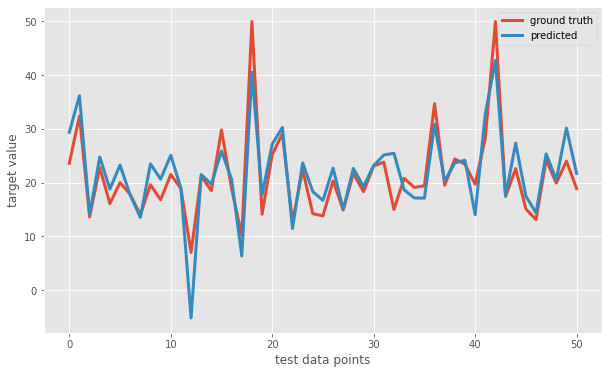

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, linewidth=3, label='ground truth')
plt.plot(y_pred, linewidth=3, label='predicted')
plt.legend(loc='best')
plt.xlabel('test data points')
plt.ylabel('target value')

Text(-5, 45, 'MSE = 14.996')

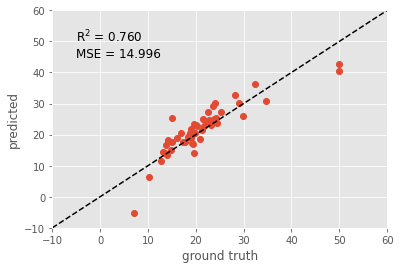

In [25]:
plt.plot(y_test, y_pred, 'o')
plt.plot([-10, 60], [-10, 60], 'k--')
plt.axis([-10, 60, -10, 60])
plt.xlabel('ground truth')
plt.ylabel('predicted')
scorestr = r'R$^2$ = %.3f' % linreg.score(X_test, y_test)
errstr = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_pred)
plt.text(-5, 50, scorestr, fontsize=12)
plt.text(-5, 45, errstr, fontsize=12)

# ラッソとリッジ回帰を適用

モデルの学習の前段階でlinregに当たる部分を次のように変更する。

In [ ]:
lassoreg = linear_model.Lasso()
regereg = linear_model.RidgeRegression()